<a href="https://colab.research.google.com/github/FerryJulyo/PCVK_Genap_2021/blob/main/Minggu11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut. 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Implementasikan 6 metode template matching pada OpenCV dengan menggunakan 
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Sehingga menghasilkan luaran seperti berikut:

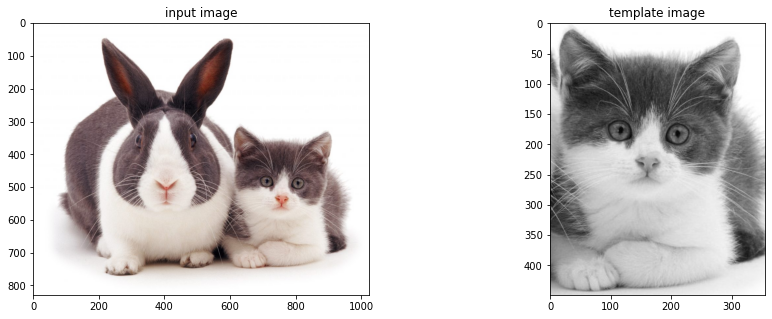

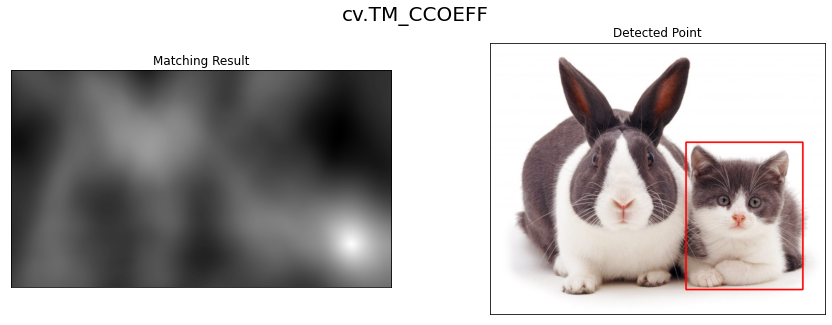

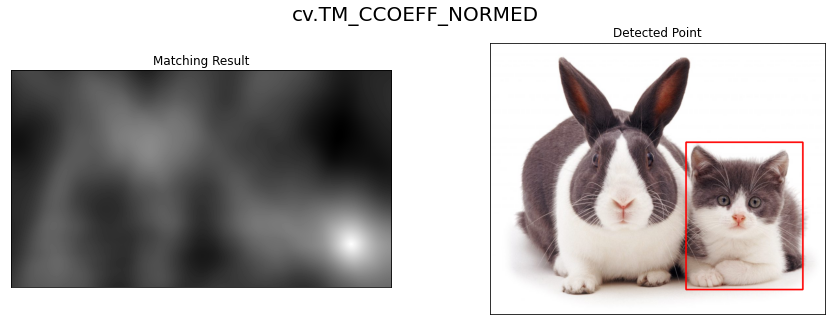

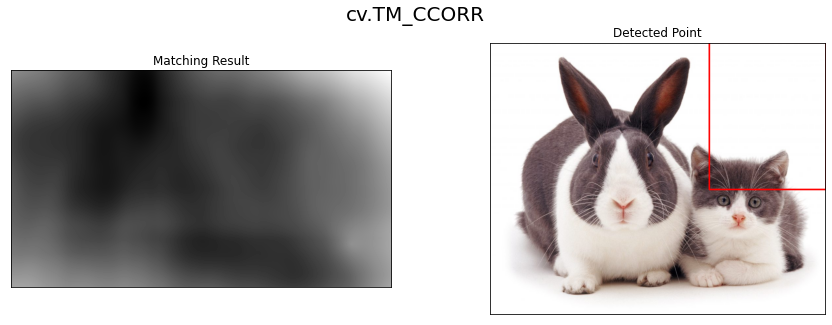

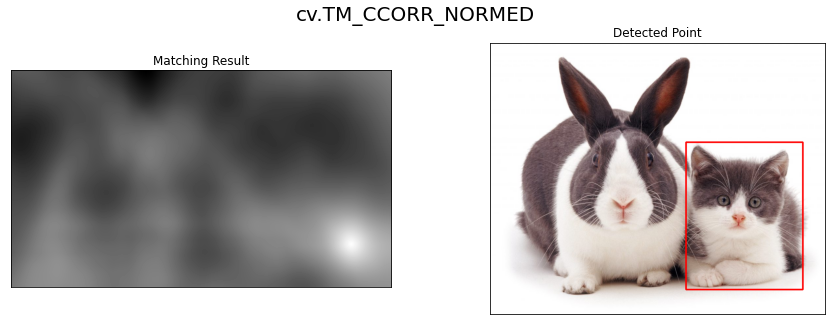

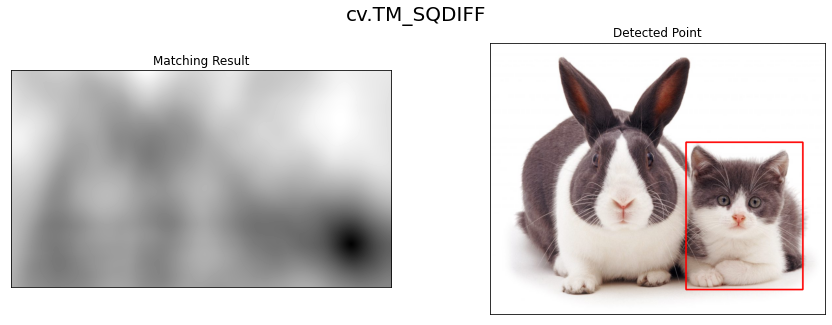

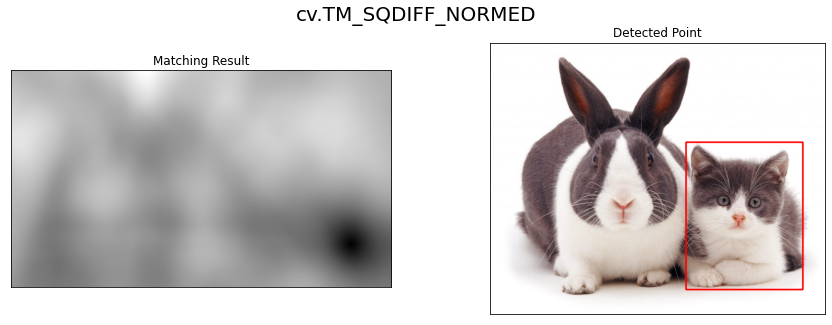

In [12]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cats_and_bunnies.jpg') 
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image2 = image.copy()
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    image = image2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(image_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(image,top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg, 
sehingga menghasilkan luaran sebagai berikut:

a. Sobel Edge Detection

b. Canny Edge Detection

c. Laplacian Edge Detection


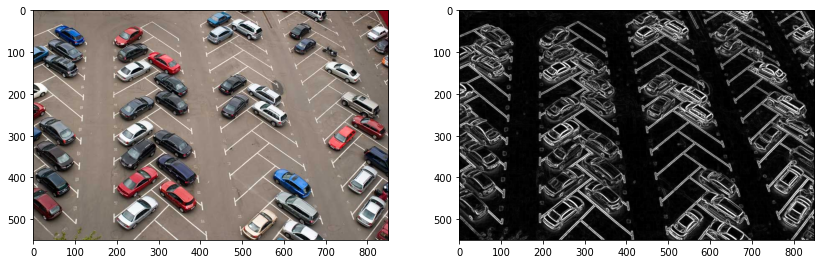

In [35]:
# Sobel Edge Detection

image_ori = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/parking-lot-cars.jpg') 

# converting to gray scale
gray = cv.cvtColor(image_ori, cv.COLOR_BGR2GRAY)

# remove noise
image = cv.GaussianBlur(gray,(3,3),0)

# obtaining a horizontal and vertical Sobel filtering of the image
image_sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
image_sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)

# image with both horizontal and vertical Sobel kernels applied
image_sobelxy = cv.addWeighted(cv.convertScaleAbs(image_sobelx), 0.5, cv.convertScaleAbs(image_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(14,7))
plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(image_sobelxy,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))

<function matplotlib.pyplot.show>

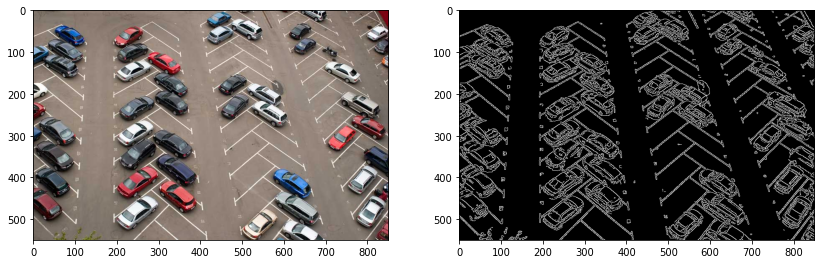

In [37]:
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/parking-lot-cars.jpg')

edges = cv.Canny(image,121 ,212)
f, axarr = plt. subplots(1,2,figsize=(14,7))

plt.subplot(121),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.show

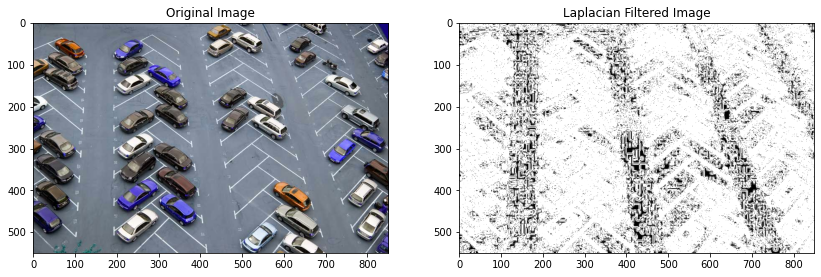

In [43]:
# Laplacian Edge Detection

image_original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/parking-lot-cars.jpg', cv.IMREAD_COLOR)

# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Reduce noise in image
image = cv.GaussianBlur(image_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(image, ksize=7, ddepth=cv.CV_16S)

# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 7))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan 
luaran sebagai berikut:

a. Harris Corner Detection

b. Shi-Tomasi Detection



Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut: